# Zuber Analysis

# Instrucciones para completar el proyecto

Paso 1. Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

Paso 2. Análisis exploratorio de datos

    Encuentra el número de viajes en taxi para cada empresa de taxis del 15 al 16 de noviembre de 2017. Nombra el campo resultante trips_amount y muéstralo junto con el campo company_name. Ordena los resultados por el campo trips_amount en orden descendente.

    Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

    En noviembre de 2017 las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Nombra el campo con nombres de empresas de taxis company. Ordena el resultado en orden descendente por trips_amount.

Paso 3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

    Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

    Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: "Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

    Recupera de la tabla trips todos los viajes que comenzaron en el Loop (neighborhood_id: 50) y finalizaron en O'Hare (neighborhood_id: 63) un sábado. Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje.
    Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:

    company_name: nombre de la empresa de taxis
    trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

project_sql_result_04.csv. Contiene los siguientes datos:

    dropoff_location_name: barrios de Chicago donde finalizaron los viajes
    average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets ahora necesitas:

    importar los archivos
    estudiar los datos que contienen
    asegurarte de que los tipos de datos sean correctos
    identificar los 10 principales barrios en términos de finalización
    hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
    sacar conclusiones basadas en cada gráfico y explicar los resultados

Paso 5. Prueba de hipótesis (Python)

project_sql_result_07.csv: el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

    start_ts: fecha y hora de recogida
    weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
    duration_seconds: duración del viaje en segundos

Prueba la hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Establece el valor del nivel de significación (alfa) por tu cuenta.

Explica:

    cómo planteaste las hipótesis nula y alternativa
    qué criterio usaste para probar las hipótesis y por qué

Los paso anteriores al 4 se hicieron en SQL ya que ahí se realizo la filtración y el acondicionamiento de datos

## Paso 4. Análisis exploratorio de datos (Python)

Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 


/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

### importar los archivos

#### Librerias

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

####  Archivo de Viajes por compañía

In [2]:
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


#### Archivo de destinos finales

In [3]:
dropoff_trips= pd.read_csv('/datasets/project_sql_result_04.csv')
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


###  estudiar los datos que contienen

In [4]:
dropoff_trips['average_trips']=np.floor(dropoff_trips['average_trips']+0.5).astype(int)
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


### identificar los 10 principales barrios en términos de finalización del recorrido

In [5]:
top_dropoff = dropoff_trips.sort_values(by='average_trips',ascending=False)
top_10_dropoff=top_dropoff.head(10)
display(top_10_dropoff)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


In [6]:
top_companies = company_trips.sort_values(by='trips_amount',ascending=False)
top_10_companies=top_companies.head(10)
display(top_10_companies)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

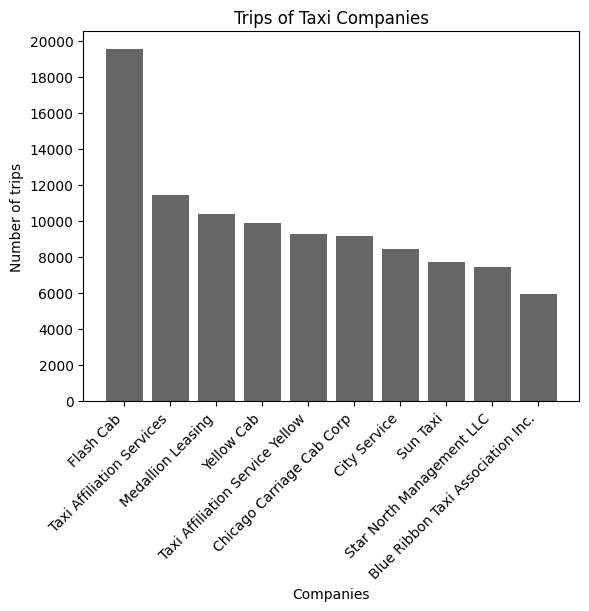

<Figure size 1600x800 with 0 Axes>

In [7]:
plt.bar(x=top_10_companies['company_name'],height=top_10_companies['trips_amount'],alpha=0.6,color='black')
plt.xticks(rotation=45, ha='right')

plt.yticks(range(0, int(top_10_companies['trips_amount'].max()) + 1000, 2000))
plt.ylabel('Number of trips')
plt.xlabel('Companies')
plt.title('Trips of Taxi Companies')

plt.figure(figsize=(16,8))
plt.show()

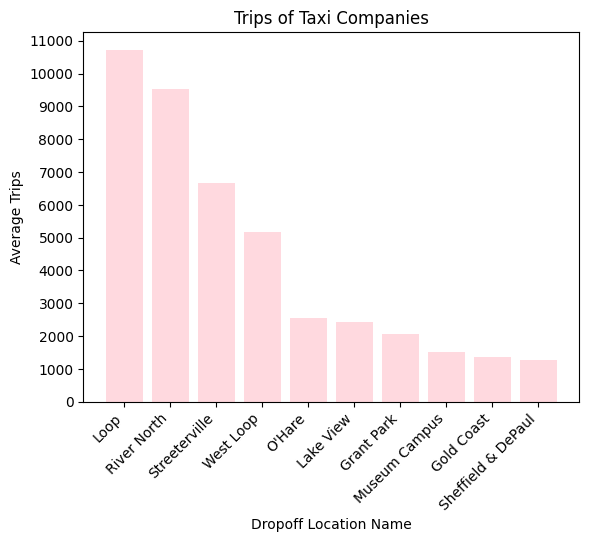

<Figure size 1600x800 with 0 Axes>

In [8]:
plt.bar(x=top_10_dropoff['dropoff_location_name'],height=top_10_dropoff['average_trips'],alpha=0.6,color='pink')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, int(top_10_dropoff['average_trips'].max()) + 1000, 1000))
plt.ylabel('Average Trips')
plt.xlabel('Dropoff Location Name')
plt.title('Trips of Taxi Companies')
plt.figure(figsize=(16,8))
plt.show()

### sacar conclusiones basadas en cada gráfico y explicar los resultados

La compañía Flash Cab sobresale con respecto a la competencia con casi 20,000 viajes, la segunda compañía con mayor número de viajes es Taxi Afilliation Services con poco menos de 12,000 viajes. A partir de esta última, las compañías de taxis tienen poca diferencia entre ellas en cuanto a viajes.
El destino final con mayor promedio de viajes es Loop y River North, con alrededor de 11,000 y 9,500 viajes promedio respectivamente. StreeterVille tiene un promedio de 6,500 viajes y West Loop un poco mas de 5,000. A apartir de este último destino los demas destinos finales tienen menos de 3,000 viajes promedio


## Paso 5. Prueba de hipótesis (Python)

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

Con un nivel de significancia de 0.05 el análisis y la interpretación se ajustan a los estándares convencionales.

Hipótesis nula

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos."


Hipótesis alternativa 

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."



In [9]:
conditions_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
conditions_trips.head(10)
good_conditions = conditions_trips[conditions_trips['weather_conditions']=='Good']
bad_conditions = conditions_trips[conditions_trips['weather_conditions']=='Bad']

In [10]:
# Prueba las hipótesis
display(good_conditions['duration_seconds'].var())
display(bad_conditions['duration_seconds'].var())
alpha = 0.05

results=st.ttest_ind(good_conditions['duration_seconds'],bad_conditions['duration_seconds'],equal_var=False)

print('valor p:',results.pvalue)# tu código: imprime el valor p obtenido)

if (results.pvalue<alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

576382.009689509

520294.086002483

valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


### cómo planteaste las hipótesis nula y alternativa

La hipotésis nula establece que la duración promedio de Loop al Aeropuerto no cambia los sábados lluviosos. Esto implica que cualquier diferencia observada en la duración de los viajes es atribuible al azar o a fluctuaciones normales, y no a la condición de lluvia. En cuanto a la hipotésis alternativa dice que si cambia, por lo tanto, implica que hay una diferencia significativa en la duración de los viajes cuando llueve los sábados. Las hipotesis nulas dictan que dos grupos al ser comparadas no tienen cambio alguno en sus datos por algún factor externo, mientras que en las hipotésis alternativas la diferencia entre ambos grupos es significativa debido a ese factor externo.

### qué criterio usaste para probar las hipótesis y por qué

El criterio elegido fue realizar una prueba t student para comparar las medias de los dos grupos. La duración promedio de los viajes los sábados lluviosos y los sábados no lluviosos. Además, dado que las varianzas de los dos grupos son diferentes, se utilizó la versión de la prueba con el argumento equal_var=False. Se rechazó la hipótesis nula, lo que implica que la duración promedio de los viajes cambia significativamente en los sábados lluviosos. 